<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Clases/Clase6/Clase6_1_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 5: Clustering


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com



Las los algoritmos de clustering corresponden a métodos no supervisados que buscan identificar estructuras de grupos dentro de un conjunto de datos. Dentro de los métodos más comunes, destacan aquellos basados en similitud, donde obervaciones que pertenecen a un mismo cluster son similares entre sí (grupos homogéneos), pero distintas a las observaciones de los otro clusters. 

Dentro de los distintos métodos destacan:


  * Enfoque de particiones 
    * K-means, k-medioids, CLARANS 
  * Enfoque jerárquico
    * Diana, Agnes, BIRCH, CAMELEON
  * Enfoque basado en densidad
    * DBSCAN, OPTICS, DenClue

A continuación se muestra la implementación de algunos de estos algoritmosen R, para mayor información refiérsa a la documentación de la clase y a las referencias citadas.




## Algoritmo k-means



In [2]:

# K-Means
# Se define el nombre de la base de datos IRIS borrando la variable en donde 
# figura el verdadero nombre de la planta definida por cada fila

data(iris)
iris
dplyr::count(iris,Species)



Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


Species,n
<fct>,<int>
setosa,50
versicolor,50
virginica,50


In [3]:
base <- iris
base$Species <- NULL
head(base)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [4]:
# Se genera la clusterización con k medias con la siguiente estructura: 
# kmeans(datos, numero de clusters que se quiere obtener) # se recomienda nstart > 1

kmeans.resultado <- kmeans(base, centers = 3, nstart = 10 ) 




In [6]:
class(kmeans.resultado)
str(kmeans.resultado)

[1] "kmeans"

List of 9
 $ cluster     : int [1:150] 3 3 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:3, 1:4] 5.9 6.85 5.01 2.75 3.07 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 681
 $ withinss    : num [1:3] 39.8 23.9 15.2
 $ tot.withinss: num 78.9
 $ betweenss   : num 603
 $ size        : int [1:3] 62 38 50
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


Hasta aquí llegó el algoritmo, pero algunas preguntas de interés que buscamos abordar a continuación.

* ¿Cómo podemos visualizar la clusterización realizada?
* ¿Que más podemos hacer además identificar los grupos generados? 
* ¿porqué escogimos 3 grupos? y ¿Cómo podemos  determinar el número óptimo de clusters?

In [7]:
str(kmeans.resultado)
kmeans.resultado$cluster



List of 9
 $ cluster     : int [1:150] 3 3 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:3, 1:4] 5.9 6.85 5.01 2.75 3.07 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 681
 $ withinss    : num [1:3] 39.8 23.9 15.2
 $ tot.withinss: num 78.9
 $ betweenss   : num 603
 $ size        : int [1:3] 62 38 50
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

In [10]:
head(base)

base$cl_kmens <- kmeans.resultado$cluster
head(base)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cl_kmens
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,3
2,4.9,3.0,1.4,0.2,3
3,4.7,3.2,1.3,0.2,3
4,4.6,3.1,1.5,0.2,3
5,5.0,3.6,1.4,0.2,3
6,5.4,3.9,1.7,0.4,3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cl_kmens
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,3
2,4.9,3.0,1.4,0.2,3
3,4.7,3.2,1.3,0.2,3
4,4.6,3.1,1.5,0.2,3
5,5.0,3.6,1.4,0.2,3
6,5.4,3.9,1.7,0.4,3


In [11]:
kmeans.resultado$centers # Que representan estos centroides?


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053
3,5.006000,3.428000,1.462000,0.246000


In [13]:
library(dplyr)

In [15]:
base %>%
  group_by(cl_kmens) %>%
  summarise( Sepal.Length_prom = mean(Sepal.Length)
          	,Sepal.Width_prom = mean(Sepal.Width)	
            ,Petal.Length_prom = mean(Petal.Length)	
            ,Petal.Width_prom = mean(Petal.Width) )

cl_kmens,Sepal.Length_prom,Sepal.Width_prom,Petal.Length_prom,Petal.Width_prom
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053
3,5.006000,3.428000,1.462000,0.246000


In [17]:

# Se contrasta la clasificacion real con la definida despues de la clusterizacion
table(iris$Species, kmeans.resultado$cluster)

base %>% 
  count(cl_kmens)




            
              1  2  3
  setosa      0  0 50
  versicolor 48  2  0
  virginica  14 36  0

cl_kmens,n
<int>,<int>
1,62
2,38
3,50


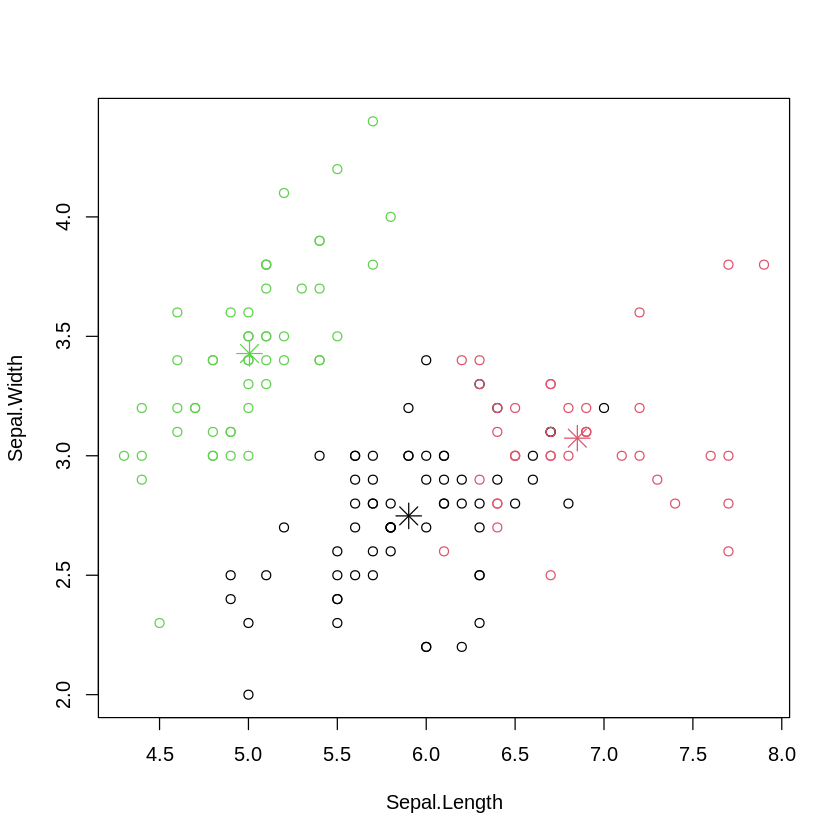

In [18]:
plot(base[c("Sepal.Length", "Sepal.Width")], col = kmeans.resultado$cluster)
# Se grafica los centros de los clusters 
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col = 1:3, pch = 8, cex=2)

In [20]:
library(ggplot2)

In [25]:
centros <- as.data.frame(kmeans.resultado$centers)
centros$cluster <- 1:3
centros


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.901613,2.748387,4.393548,1.433871,1
2,6.850000,3.073684,5.742105,2.071053,2
3,5.006000,3.428000,1.462000,0.246000,3


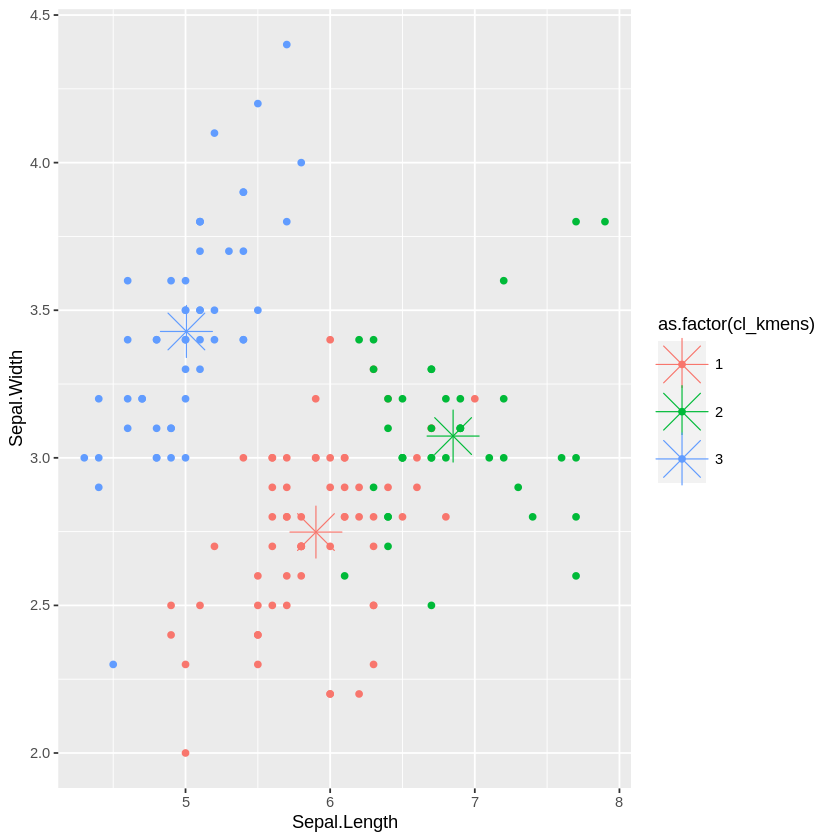

In [26]:
# Con ggplot 
base %>%
  ggplot() +
  aes(x = Sepal.Length, y = Sepal.Width, color = as.factor(cl_kmens) ) +
  geom_point() +
  geom_point(data = centros, 
             mapping = aes(x = Sepal.Length, y = Sepal.Width, color = as.factor(cluster) ),
             shape = 8,
             size = 10) 


In [29]:
# Se calcula la distancia entre cada observación y los centroides de los clusters

centroides <- kmeans.resultado$centers[kmeans.resultado$cluster, ]
head(centroides)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
3,5.006,3.428,1.462,0.246
3,5.006,3.428,1.462,0.246
3,5.006,3.428,1.462,0.246
3,5.006,3.428,1.462,0.246
3,5.006,3.428,1.462,0.246
3,5.006,3.428,1.462,0.246


In [30]:
head(base)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cl_kmens
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,3
2,4.9,3.0,1.4,0.2,3
3,4.7,3.2,1.3,0.2,3
4,4.6,3.1,1.5,0.2,3
5,5.0,3.6,1.4,0.2,3
6,5.4,3.9,1.7,0.4,3


In [35]:
base$cl_kmens <- NULL 
head(base)



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [36]:
distancias <- sqrt(rowSums((base - centroides)^2))
distancias

[1] 0.14135063 0.44763825 0.41710910 0.52533799 0.18862662 0.67703767
  [7] 0.41518670 0.06618157 0.80745278 0.37627118 0.48247280 0.25373214
 [13] 0.50077939 0.91322505 1.01409073 1.20481534 0.65420180 0.14415270
 [19] 0.82436642 0.38933276 0.46344363 0.32860310 0.64029681 0.38259639
 [25] 0.48701129 0.45208406 0.20875823 0.21536016 0.21066561 0.40838707
 [31] 0.41373905 0.42565244 0.71552778 0.91977171 0.34982853 0.35039977
 [37] 0.52685861 0.25686572 0.76077592 0.11480418 0.18541845 1.24803045
 [43] 0.66901420 0.38675574 0.60231221 0.48205809 0.41034132 0.47199576
 [49] 0.40494444 0.14959947 1.22697525 0.68414100 1.01903626 0.73153652
 [55] 0.63853451 0.26937898 0.76452634 1.58388575 0.75582717 0.85984838
 [61] 1.53611907 0.32426175 0.80841374 0.39674141 0.87269542 0.87306498
 [67] 0.41229163 0.53579956 0.63676390 0.71254917 0.70937310 0.46349013
 [73] 0.69373966 0.43661144 0.54593856 0.74313017 0.98798453 0.84636259
 [79] 0.21993519 1.02437260 0.86396528 0.97566381 0.55763082 0.73395781
 [85] 0.57500396 0.68790275 0.92700552 0.61459444 0.50830256 0.62911910
 [91] 0.48790256 0.38266958 0.49185351 1.54856350 0.38560870 0.44284695
 [97] 0.34498790 0.37241653 1.66064034 0.38393196 0.77731871 0.85382472
[103] 0.30610139 0.65293923 0.38458885 1.14225684 1.07101875 0.78573677
[109] 0.65454939 0.84355960 0.74552218 0.75289837 0.25958095 0.88917352
[115] 1.20227628 0.68288333 0.50991553 1.47791217 1.52971038 0.82617494
[121] 0.26952816 0.81891975 1.31149299 0.74269596 0.27627819 0.52766931
[127] 0.62526165 0.70228926 0.54629196 0.59428255 0.73126650 1.43802246
[133] 0.56055720 0.81536685 1.12133058 0.95311851 0.73306362 0.57903109
[139] 0.61011676 0.34794609 0.38934920 0.68403844 0.85382472 0.30952112
[145] 0.50939919 0.61173881 0.89747884 0.65334214 0.83572418 0.83452741

In [38]:

# Se ordenan los registros con mayor distancia a sus respectivos centroides y se toman los top 5

outliers <- order(distancias, decreasing=T)[1:5]
outliers
# Cuales son los outliers


print(outliers)
print(base[outliers,])


[1]  99  58  94  61 119

[1]  99  58  94  61 119
    Sepal.Length Sepal.Width Petal.Length Petal.Width
99           5.1         2.5          3.0         1.1
58           4.9         2.4          3.3         1.0
94           5.0         2.3          3.3         1.0
61           5.0         2.0          3.5         1.0
119          7.7         2.6          6.9         2.3


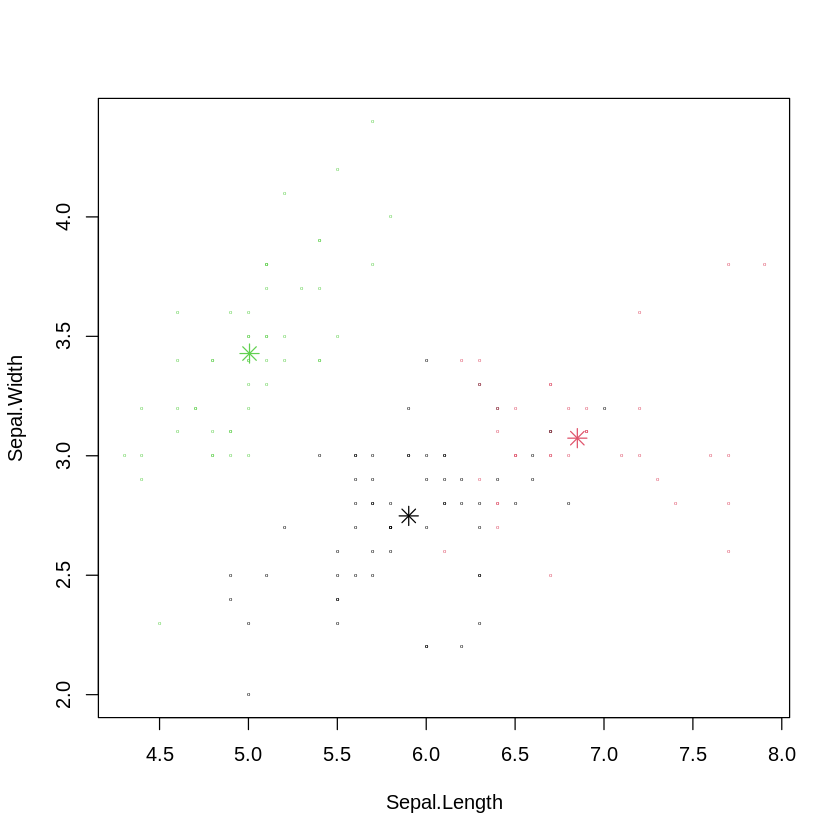

In [39]:
# Se grafican los clusters
plot(base[,c("Sepal.Length", "Sepal.Width")], pch="o", col=kmeans.resultado$cluster, cex=0.3)
#Se marcan los centroides de los clusters
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=1.5)




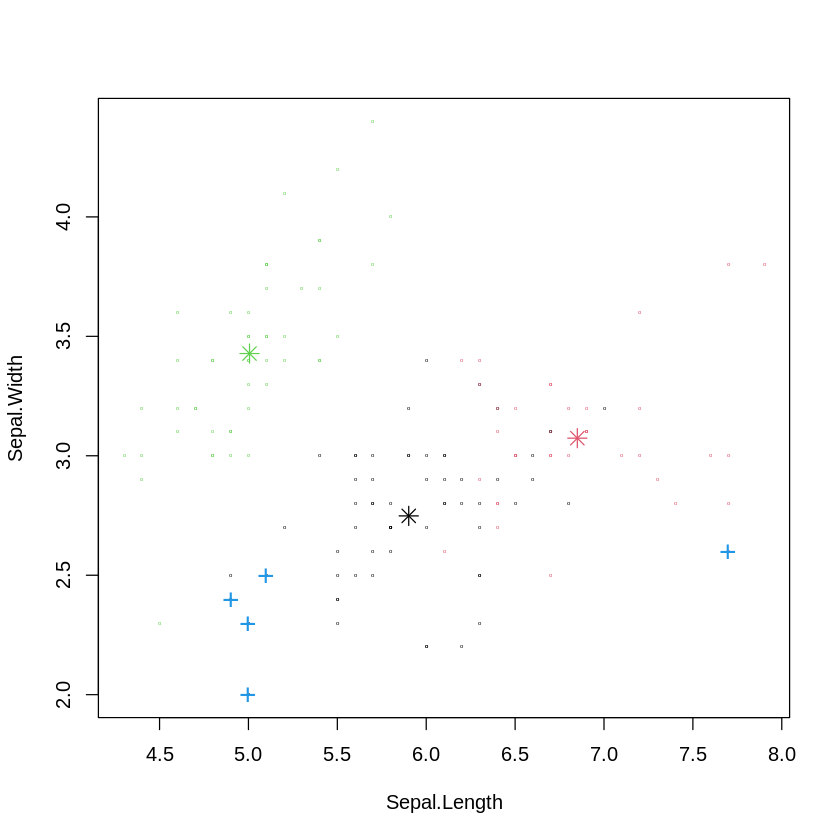

In [40]:
# Se grafican los outliers
plot(base[,c("Sepal.Length", "Sepal.Width")], pch="o", col=kmeans.resultado$cluster, cex=0.3)
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=1.5)
points(base[outliers, c("Sepal.Length", "Sepal.Width")], pch="+", col=4, cex=1.5)


 ## Número de clusters

 Una de las opciones más utilizadas es la regla del "codo". Otra manera es estudiando el ancho de "silueta" de cada observación.

In [ ]:
names(base)
base$cl_kmens <- NULL

In [42]:
names(base)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"

In [ ]:
kmeans.resultado$tot.withinss

In [48]:
twss_df <- data.frame()
twss_df

<0 x 0 matrix>

In [49]:
# Generar un ciclo for que implemente el algoritmo kmeans con centros 2:50
# En cada iteración rescatar el total within sum squares (twss) y guardar dicho resultado en un dataframe
# OP1
centers <- 2:50
twss_df <- data.frame(K=NA, TWSS=NA)# 49x2, columnas: K, TWSS

for(k in centers){
  mod_km <- kmeans(base,centers = k, nstart = 10)
  twss <- mod_km$tot.withinss
  twss_df[k,2] <- twss
  twss_df[k,1] <- k

}

twss_df







,K,TWSS
,<int>,<dbl>
1,NA,NA
2,2,152.347952
3,3,78.851441
4,4,57.228473
5,5,46.446182
6,6,39.369246
7,7,36.837136
8,8,30.184545
9,9,27.786092


In [56]:
# OP2
centers <- 2:10
twss_df <- data.frame()# 49x2, columnas: K, TWSS

for(k in centers){
  mod_km <- kmeans(base,centers = k, nstart = 10)
  twss <- mod_km$tot.withinss
  aux <- data.frame(K = k, TWSS = twss)

  twss_df <- bind_rows(twss_df,aux)

}

twss_df

K,TWSS
<int>,<dbl>
2,246.56076
3,126.98407
4,77.41081
5,46.44618
6,39.03999
7,34.73552
8,32.53267
9,29.63389
10,27.13793


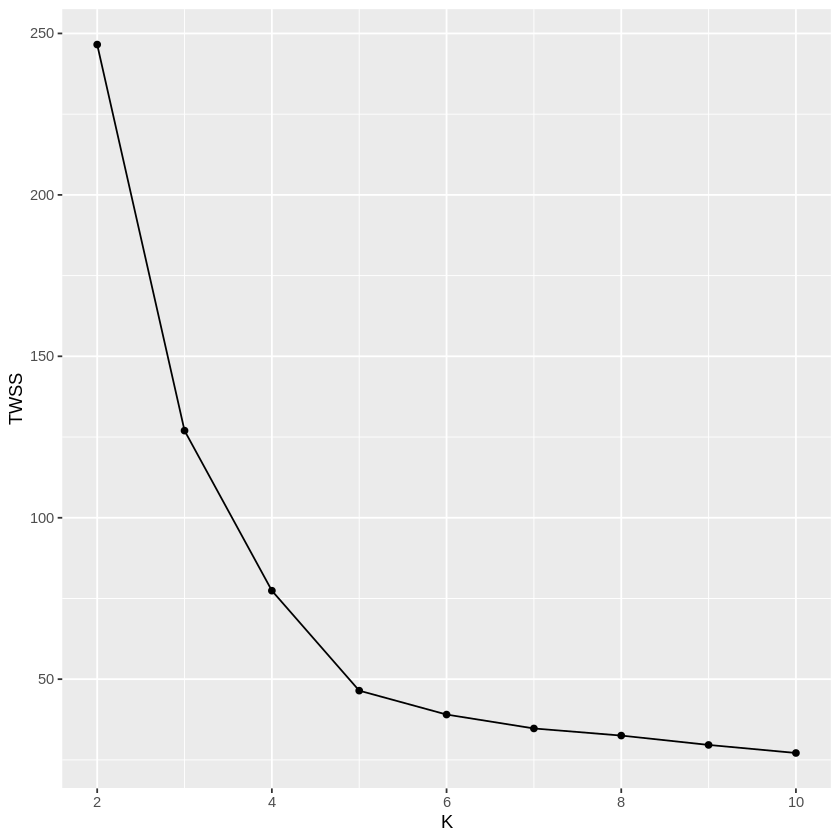

In [57]:
twss_df %>%
  ggplot() +
  aes(x = K, y = TWSS) +
  geom_point()+
  geom_line()

In [ ]:
# Graficar
# Esta regla nos sugiere que un K = 5 o 6 podría ser razonable

In [53]:
  mod_km5 <- kmeans(base,centers = 5, nstart = 10)

In [54]:
base$cl_km5 <- mod_km5$cluster

In [55]:
count(base,cl_km5)

cl_km5,n
<int>,<int>
1,50
2,25
3,24
4,39
5,12


## **NOTA:** Escala de datos 
En ocasiones, cuando cada variable (columna) de nuestro set de datos tienen diferentes escala de datos (por ejemplo una columna con valores entre 0 y 1 , mientras que otra columna está en escala de 10 a 1000, ciertos algoritmos son suceptibles a dichas escalas, por tanto se recomienda escalar nuestra matriz de datos.

Cuando nos referimos a escalar, es equivalente a generar columnas con igual media y varianza, usualmente media 0 y desv. estándar 1. Esto lo podemos lograr con la función `scale()`

# Cluster jerárquico


Para ajustar un cluster jerárquico, en R contamos con la función `hclust()`

In [58]:
library(ggplot2)
## Clústers  jerárquicos
muestraIris <- iris
muestraIris$Species <- NULL


## Cluster aglomerativo
# Se genera el cluster aglomerativo con linkage completo.

hc <- hclust(dist(muestraIris), method="complete")


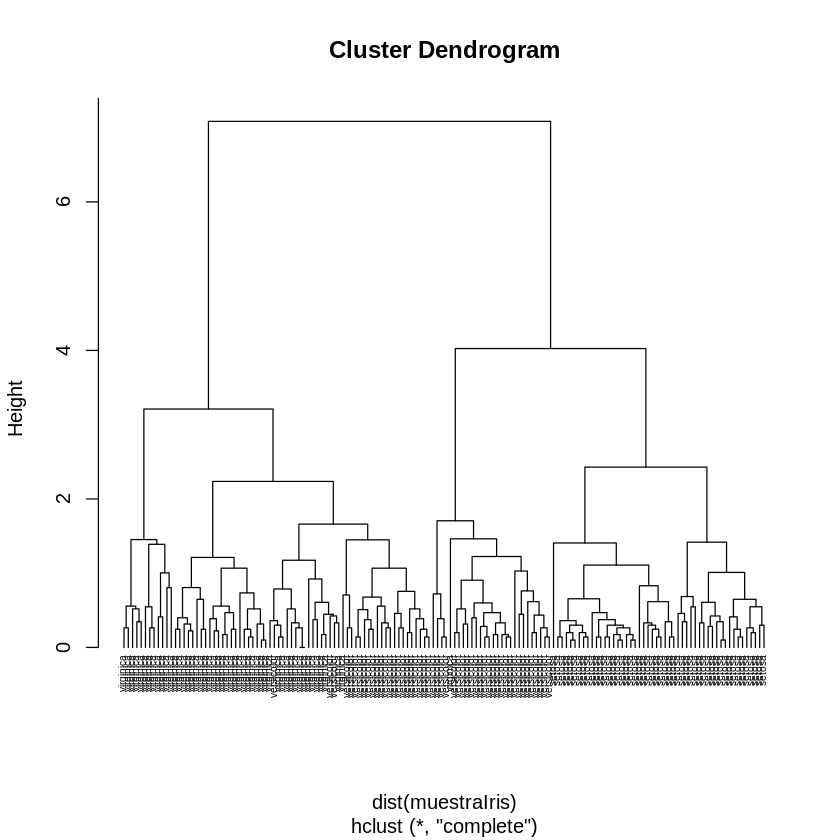

In [63]:


plot(hc, 
     hang   = -1, #posición inicio dendograma
     labels = iris$Species,
     cex    = .5
     )



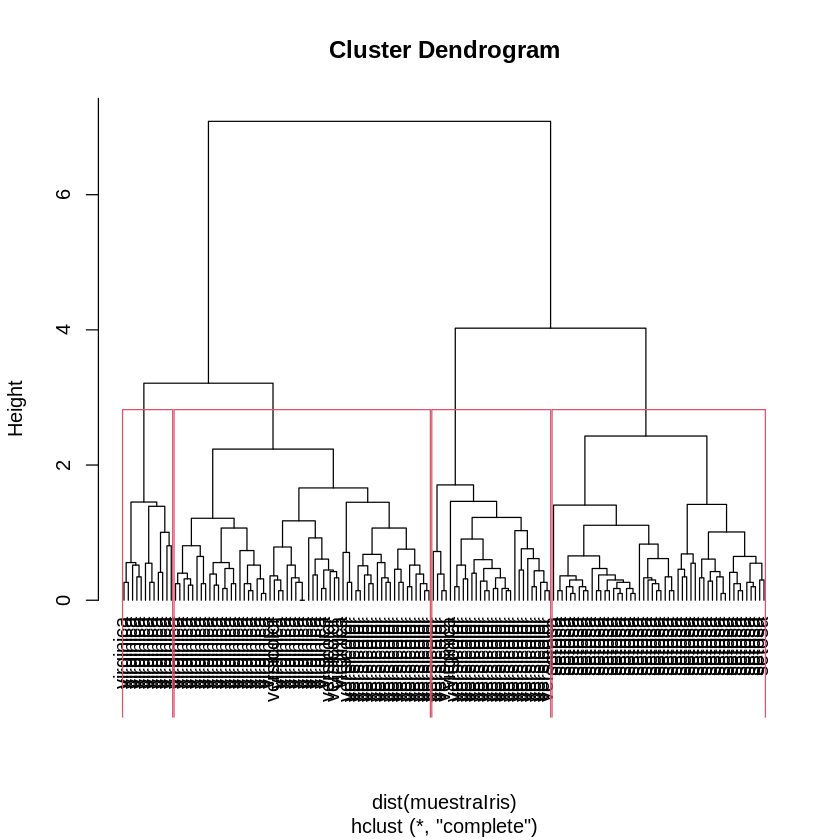

In [76]:

# Finalmente  se corta el dendograma en K clusters
K <- 4

plot(hc, hang = -1, labels=iris$Species)
rect.hclust(hc, k=K)


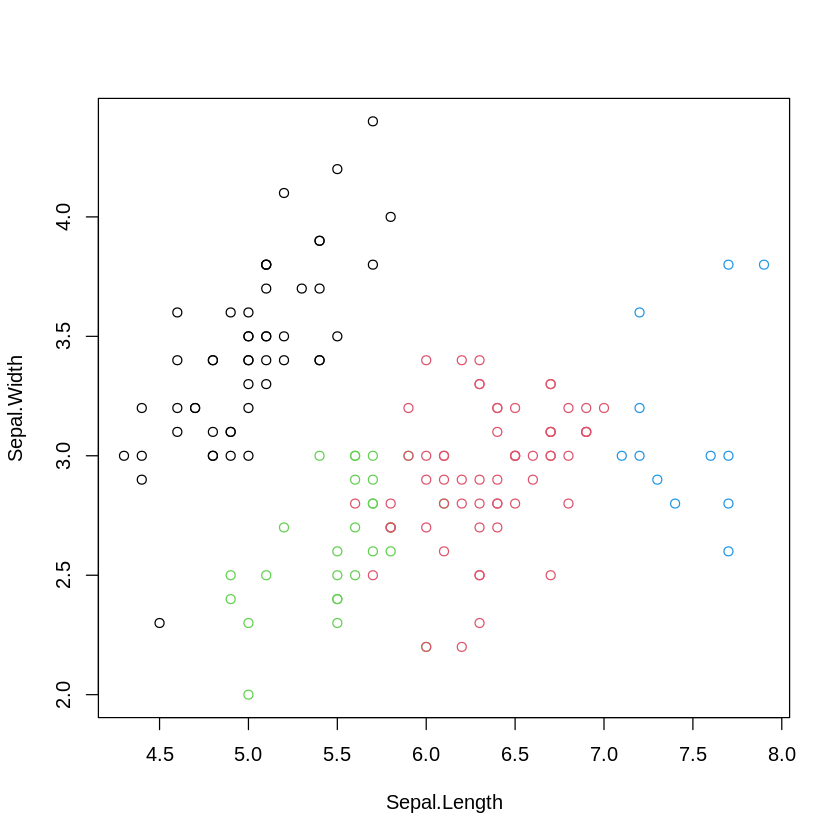

In [77]:
groups <- cutree(hc, k=K)

plot(iris[,c("Sepal.Length", "Sepal.Width")], col = groups)



In [78]:
groups

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 [75] 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 2 2 4 2 2 4 3 4 2 4 2
[112] 2 2 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 4 4 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

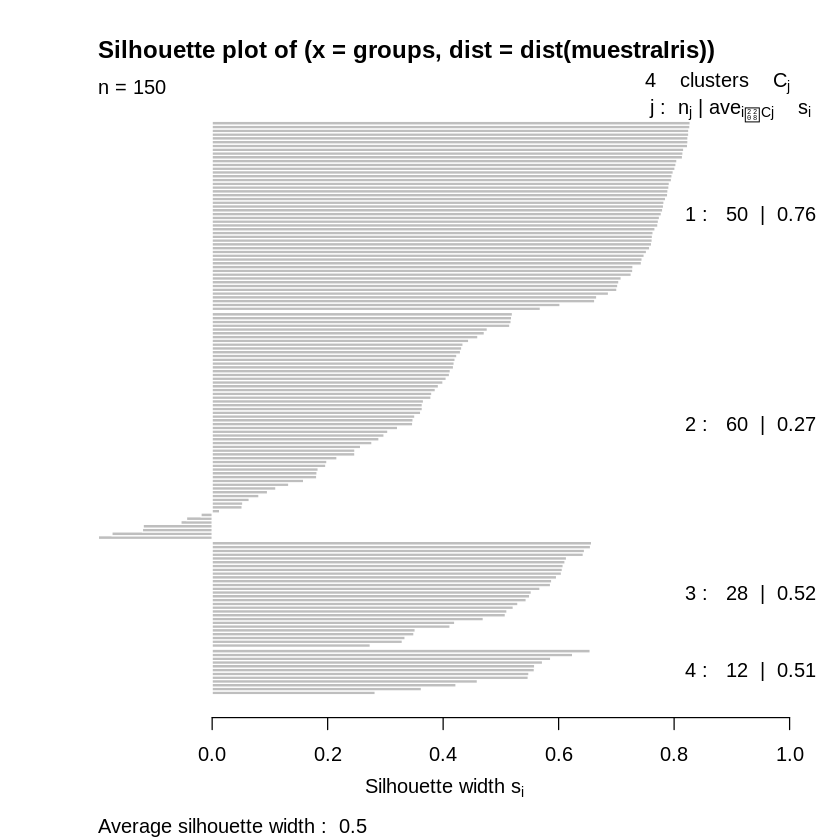

In [79]:

# gráfico de siluetas  ----------------------------------------------------
plot(cluster::silhouette(groups,dist(muestraIris))) 



In [82]:
sil <- cluster::silhouette(groups,dist(muestraIris))

head(sil)


cluster,neighbor,sil_width
1,3,0.8278503
1,3,0.7802137
1,3,0.7984838
1,3,0.7669380
1,3,0.8239615
1,3,0.7083621


In [83]:
str(sil)
mean(sil[,3])

 'silhouette' num [1:150, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "cluster" "neighbor" "sil_width"
 - attr(*, "Ordered")= logi FALSE
 - attr(*, "call")= language silhouette.default(x = groups, dist = dist(muestraIris))


[1] 0.4998128

In [87]:
siluetas_prom <- data.frame()
#"single", "complete", "average" 
for(m in c("single", "complete", "average" )){
  for(k in 2:20){
    hc <- hclust(dist(muestraIris), method=m)
    groups <- cutree(hc, k=k)
    sil <- cluster::silhouette(groups,dist(muestraIris))
    
    siluetas_prom <- bind_rows(siluetas_prom, data.frame(K = k, sil_prom = mean(sil[,3]), method = m ))
  }

}
  

In [88]:
siluetas_prom

K,sil_prom,method
<int>,<dbl>,<chr>
2,0.686735073,single
3,0.512110775,single
4,0.281939191,single
5,0.283811965,single
6,0.221442703,single
7,0.132763112,single
8,0.058702851,single
9,0.022430278,single
10,0.025147810,single


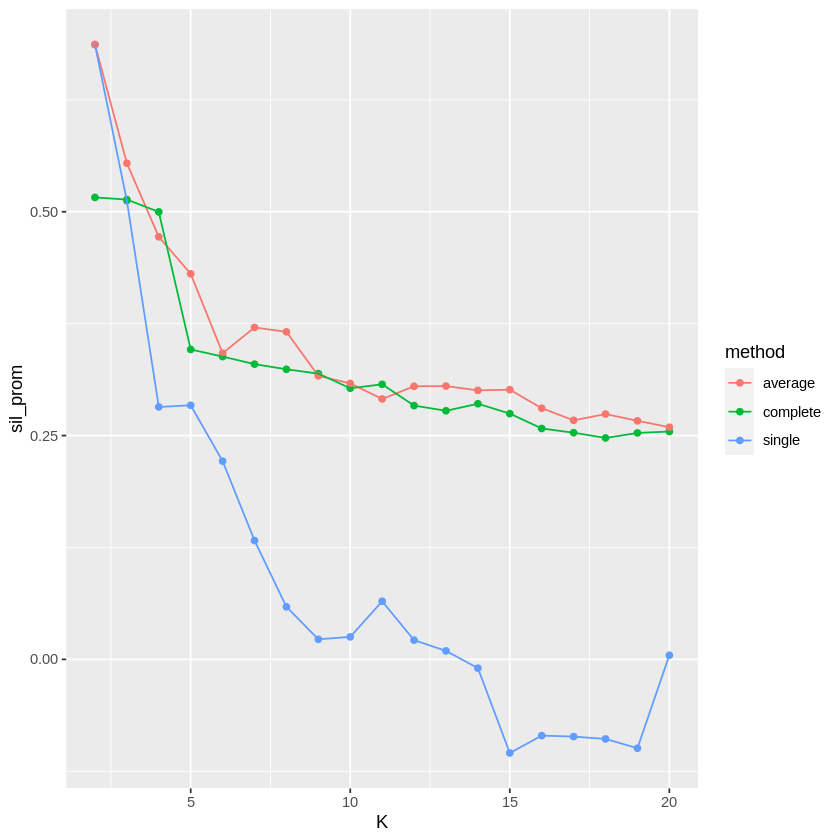

In [89]:
siluetas_prom %>%
  ggplot() +
  aes(x = K, y = sil_prom, color = method) +
  geom_point() +
  geom_line()
  # De acuerdo a la visualización, una opción recomendable seríaescoger el método "average", con K = 3

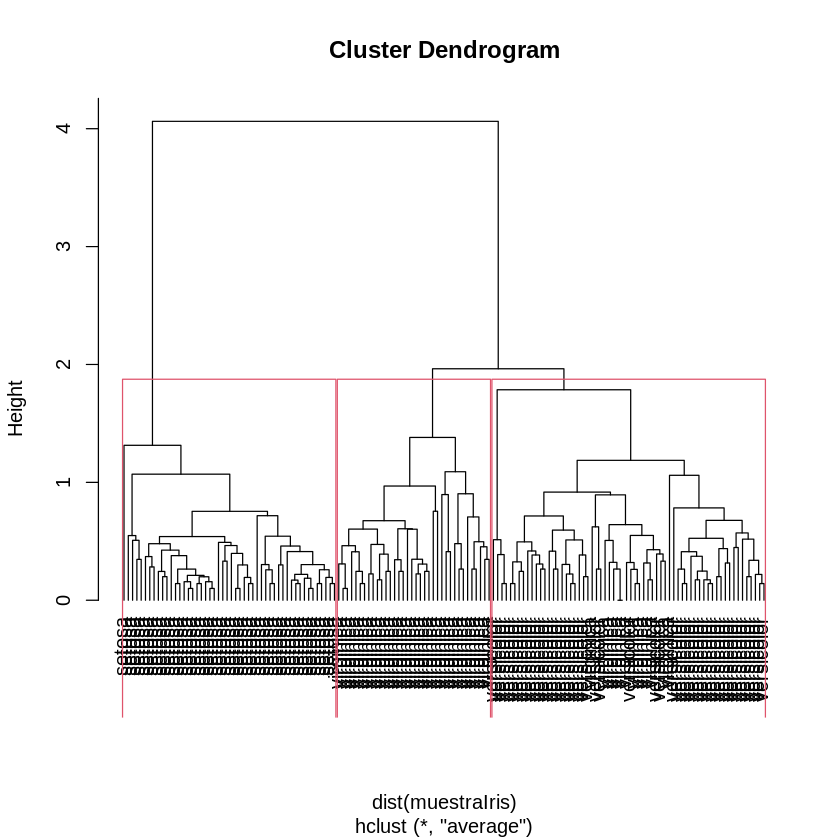

In [90]:
hc3 <- hclust(dist(muestraIris), method="average")

plot(hc, hang = -1, labels=iris$Species)
rect.hclust(hc, k=3)

## DBSCAN

In [ ]:
#install.packages("dbscan")
#install.packages("mlbench")

In [ ]:
library(dbscan)
library(mlbench)

In [ ]:
# iris --------------------------------------------------------------------
data(iris)
iris <- as.matrix(iris[,1:4])

## find suitable eps parameter using a k-NN plot for k = dim + 1
## Look for the knee!

minPts <- 4+1

kNNdistplot(iris, k = minPts)
abline(h=.6, col = "red", lty=2)



In [ ]:
###### Es lo mismo que 
sort(kNNdist(iris, k = minPts)) -> distancias_knn

plot(distancias_knn,type = "l")
abline( h =.6, col = "red", lty=2)
######


In [ ]:
res <- dbscan(iris, eps = .4, minPts = minPts)
res

pairs(iris, col = res$cluster + 1L)



In [ ]:
# espiral -----------------------------------------------------------------
set.seed(666)
spiral <- mlbench.spirals(6000, 1, sd = 0.06)
spiral <- cbind(spiral$x, label = spiral$classes)
colnames(spiral)[c(1, 2)] <- c("x1", "x2")
spiral <- as.data.frame(spiral)
spiral$label <- factor(spiral$label)



ggplot(spiral) + 
  aes(x = x1, y = x2) + 
  geom_point()


In [ ]:
minPts <- 6

kNNdistplot(spiral[,1:2], k = minPts)
#abline(h=.04, col = "red", lty = 2)



In [ ]:
eps <- 0.04

res_spiral <- dbscan(spiral[,1:2], eps = eps, minPts = minPts)
res_spiral



In [ ]:
res_spiral$cluster

spiral2 <- spiral 

spiral2$cl <- res_spiral$cluster #== 0L



In [ ]:

ggplot(spiral2) + 
  aes(x = x1, y = x2, color = as.factor(cl) ) + 
  geom_point()

## OPTICS

In [ ]:
set.seed(2)
n <- 400

x <- cbind(
  x = runif(4, 0, 1) + rnorm(n, sd=0.1),
  y = runif(4, 0, 1) + rnorm(n, sd=0.1)
)

plot(x, col=rep(1:4, time = 100))


In [ ]:

### run OPTICS (Note: we use the default eps calculation)
res <- optics(x, minPts = 5)
res




In [ ]:
### get order
res$order

### plot produces a reachability plot
plot(res)
abline(h = .05, col = "red", lty = 2)




In [ ]:

### extract a DBSCAN clustering by cutting the reachability plot at eps_cl
res2 <- extractDBSCAN(res, eps_cl = .054)
res2



In [ ]:
plot(res2)  ## black is noise


In [ ]:
hullplot(x, res2)


